# Implementasi Down Sampling dan Up Sampling Suatu Gambar
## Down Sampling
* **Max Sampling**, menurunkan ukuran gambar dengan mengambil intensity maksimal di sekitar pixel tersebut
* **Average**, menurunkan ukuran gambar dengan mengambil rata-rata intensity di sekitar pixel tersebut
* **Medium**, menurunkan ukuran gambar dengan mengambil median dari intensity di sekitar pixel tersebut
## Up Sampling
* **Nearest Neighbor**, meningkatkan ukuran gambar dengan mereferensikan tetangga dekat pixel tersebut, tanpa adanya komputasi atau perhitungan.
* **Bilinear**, meningkatkan ukuran gambar dengan mereferensikan tetangga dekat pixel dan menghitungnya sehingga menghasilkan gambar yang lebih halus.
* **Bicubic**,  meningkatkan ukuran gambar dengan mereferensikan tetangga dekat pixel yang lebih luas daripada bilinear dan menghitungnya sehingga menghasilkan gambar yang lebih detail.

**Disusun oleh:** <br>
Danar Fathurahman <br>
24/538200/PA/22828

In [48]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca suatu gambar dan interpretasikan sebagai matriks
img = cv2.imread("/content/947-512x512.jpg", 0)

print(f"Image shape: {img.shape}")

Image shape: (512, 512)


Original Image:


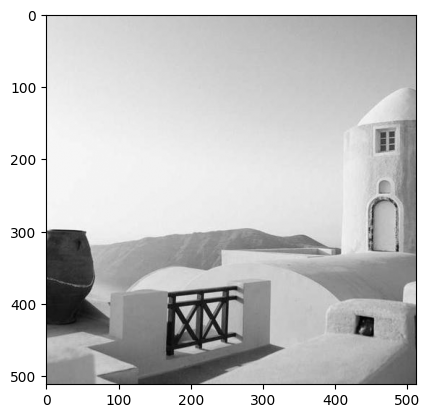

In [49]:
# Cetak gambar yang diload
print("Original Image:")
plt.imshow(img, cmap="gray")

# Down Sampling

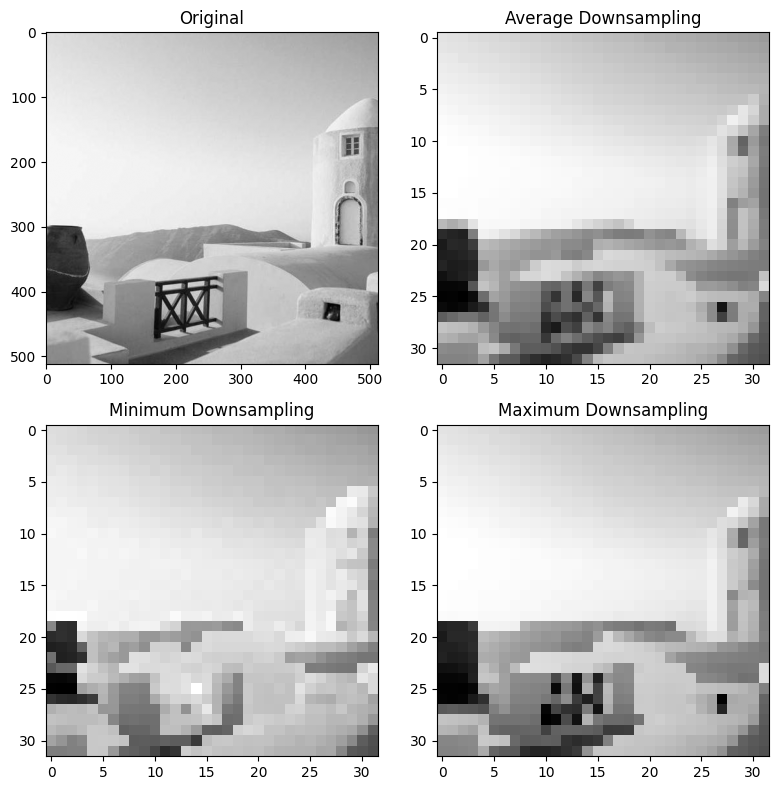

In [50]:
# Membuat fungsi downsample menggunakan rata-rata
def avg_downsample(x, s=4):
    h, w = x.shape
    h2, w2 = (h//s)*s, (w//s)*s
    x = x[:h2,:w2]
    x = x.reshape(h2//s, s, w2//s, s).mean(axis=(1,3))
    return x.astype(np.uint8)

# Membuat fungsi downsample menggunakan nilai maksimal
def max_downsample(x, s=4):
    h, w = x.shape
    h2, w2 = (h//s)*s, (w//s)*s
    x = x[:h2,:w2]
    x = x.reshape(h2//s, s, w2//s, s).max(axis=(1,3))
    return x.astype(np.uint8)

# Membuat fungsi downsample menggunakan nilai median
def median_downsample(x, s=4):
    h, w = x.shape
    h2, w2 = (h//s)*s, (w//s)*s
    x = x[:h2,:w2]
    x = x.reshape(h2//s, s, w2//s, s)
    x = np.median(x, axis=(1,3))
    return x.astype(np.uint8)

s = 16 # Membuat variabel 16 kali diperkecil dari gambar asli

# Implementasi fungsi dari gambar
img1 = avg_downsample(img, s)
img2 = max_downsample(img, s)
img3 = median_downsample(img, s)

# Menampilkan gambar
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img, cmap="gray")
axs[0, 0].set_title("Original")
axs[0, 1].imshow(img1, cmap="gray")
axs[0, 1].set_title("Average Downsampling")
axs[1, 0].imshow(img2, cmap="gray")
axs[1, 0].set_title("Minimum Downsampling")
axs[1, 1].imshow(img3, cmap="gray")
axs[1, 1].set_title("Maximum Downsampling")

plt.tight_layout()
plt.show()

## Analisis Downsampling
* Dapat dilihat bahwa terdapat perbedaan yang jelas diantara ketiga gambar tersebut.
* **Average Down Sampling** memiliki hasil yang baik karena mepertahankan karakteristik suatu gambar secara merata. Hal ini dapat diprediksi karena metode yang digunakan adalah rata-rata
* **Minimum Down Sampling** memiliki hasil yang terlihat lebih cerah, karena metodenya adalah mengambil nilai minimumnya.
* **Maximum Down Sampling** memiliki hasil yang terlihat tajam karena terdapat intensitas yang lebih gelap. Hal ini dapat diprediksi karena metode yang digunakan adalah nilai max atau pixel yang memiliki intensity besar/gelap.


---



# Up Sampling

In [51]:
# Membaca suatu gambar dan interpretasikan sebagai matriks
# Di sini saya menggunakan foto yang kecil (64x64) sehingga terlihat bagaimana hasilnya
low_img = cv2.imread("/content/534-64x64.jpg", 0)

print(f"Image shape: {low_img.shape}")

Image shape: (64, 64)


Original Image:


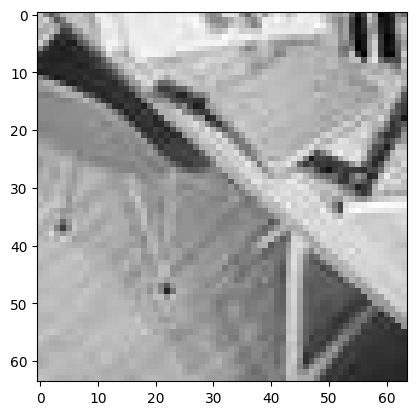

In [52]:
# Cetak gambar yang diload
print("Original Image:")
plt.imshow(low_img, cmap="gray")

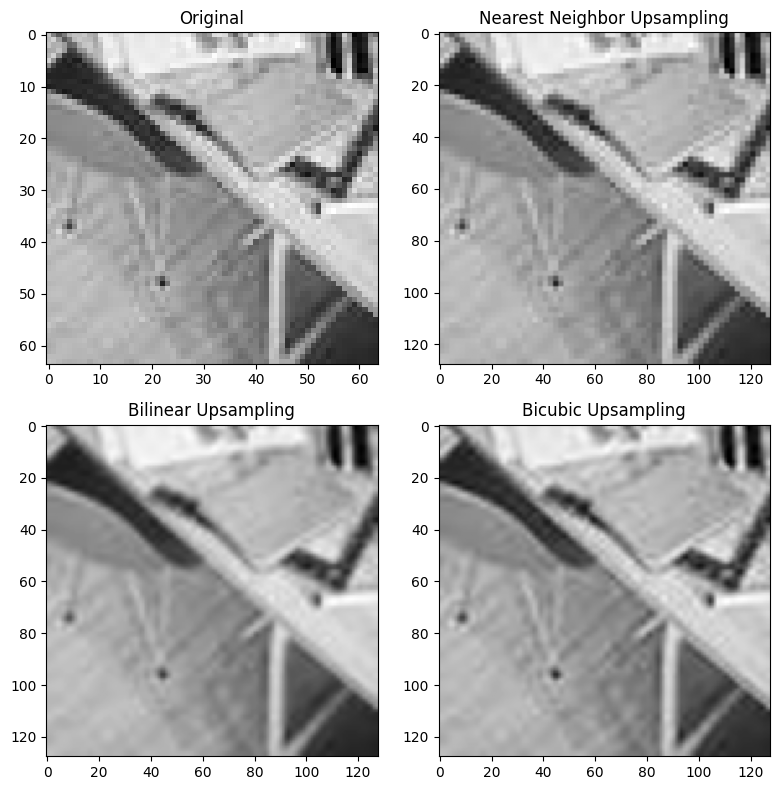

In [53]:
# Membuat fungsi up sample menggunakan nilai tetangganya, axis 1 dan axis 3.
def nn_upsample(img, s=4):
    h, w = img.shape
    h2, w2 = h*s, w*s
    img = img.reshape(h, 1, w, 1)
    img = np.repeat(img, s, axis=1)
    img = np.repeat(img, s, axis=3)
    return img.reshape(h2, w2)

# Membuat fungsi up sample menggunakan fungsi library bilinear.
def bilinear_upsample(img, s=4):
    h, w = img.shape
    h2, w2 = h*s, w*s
    new_img = cv2.resize(img, (w2, h2), interpolation=cv2.INTER_LINEAR)
    return new_img

# Membuat fungsi up sample menggunakan fungsi library bicubic.
def bicubic_upsample(img, s=4):
    h, w = img.shape
    h2, w2 = h*s, w*s
    new_img = cv2.resize(img, (w2, h2), interpolation=cv2.INTER_CUBIC)
    return new_img

s = 2 # Membuat variabel 2 kali diperbesar dari gambar asli

# Implementasi fungsi pada gambar low_img
low_img1 = nn_upsample(low_img, s)
low_img2 = bilinear_upsample(low_img, s)
low_img3 = bicubic_upsample(low_img, s)

# Menampilkan hasil up sampling
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(low_img, cmap="gray")
axs[0, 0].set_title("Original")
axs[0, 1].imshow(low_img1, cmap = "gray")
axs[0, 1].set_title("Nearest Neighbor Upsampling")
axs[1, 0].imshow(low_img2, cmap = "gray")
axs[1, 0].set_title("Bilinear Upsampling")
axs[1, 1].imshow(low_img3, cmap = "gray")
axs[1, 1].set_title("Bicubic Upsampling")

plt.tight_layout()
plt.show()

## Analisis Upsampling
* Terlihat jelas bahwa terdapat beberapa perbedaan pada masing-masing metode
* **NN Up Sampling** menghasilkan gambar yang tidak menyatu dengan baik (pecah-pecah) karena pada dasarnya metode tersebut hanya mengambil tetangga dari pixel yang ingin diperbesar.
* Berbeda dengan NN, **Bilinear Up Sampling** memilki hasil yang jauh lebih menyatu (halus) karena metode tersebut mengambil tetangga pixel terdekat dan mengkomputasinya sehingga mendapat hasil transisi antar pixel yang baik.
* **Bicubic Up Sampling** memiliki hasil yang sama halus jika dibandingkan dengan NN. Bicubic cenderung mempertahankan detail dari gambar tersebut. Namun hal ini terdapat noise karena Bicubic mengambil referensi tetangga pixel yang lebih luas dibandingkan dengan Bilinear.